#Monitoria 02: Aprofundando em Python

Autores: Hugo Amorim - 2020.3 (haan2@ecomp.poli.br), Ana Catarina Fonseca - 2020.1

Duvidas: acgfp@ecomp.poli.br

Este trabalho foi criado para a disciplina de Inteligencia Artificial do curso de Engenharia da Computação da UPE, ministrada pelo Prof. Fernando Buarque. 

1. Bubble Sort
2. Calculadora
3. Problema do Caixeiro Viajante


**Bubble Sort**

É um algoritmo de ordenação. Os algoritmos de ordenação são clássicos na Computação. Você pode ler mais em [1](http://ww2.inf.ufg.br/~hebert/disc/aed1/AED1_04_ordenacao1.pdf) e [2](https://pt.wikipedia.org/wiki/Algoritmo_de_ordena%C3%A7%C3%A3o).

[Visual Go](https://visualgo.net/bn/sorting)
-- Contribuição de Felipe Bruce

[Vídeo sobre Bubble Sort](https://youtu.be/6Gv8vg0kcHc) 

[Visualizando o Bubble Sort](https://www.youtube.com/watch?v=Cq7SMsQBEUw&ab_channel=TimoBingmann)

[Visualizando algoritmos de ordenação](https://www.youtube.com/watch?v=kPRA0W1kECg&ab_channel=TimoBingmann)

Sobre o [Bubble Sort](https://www.productplan.com/glossary/bubble-sort/): 

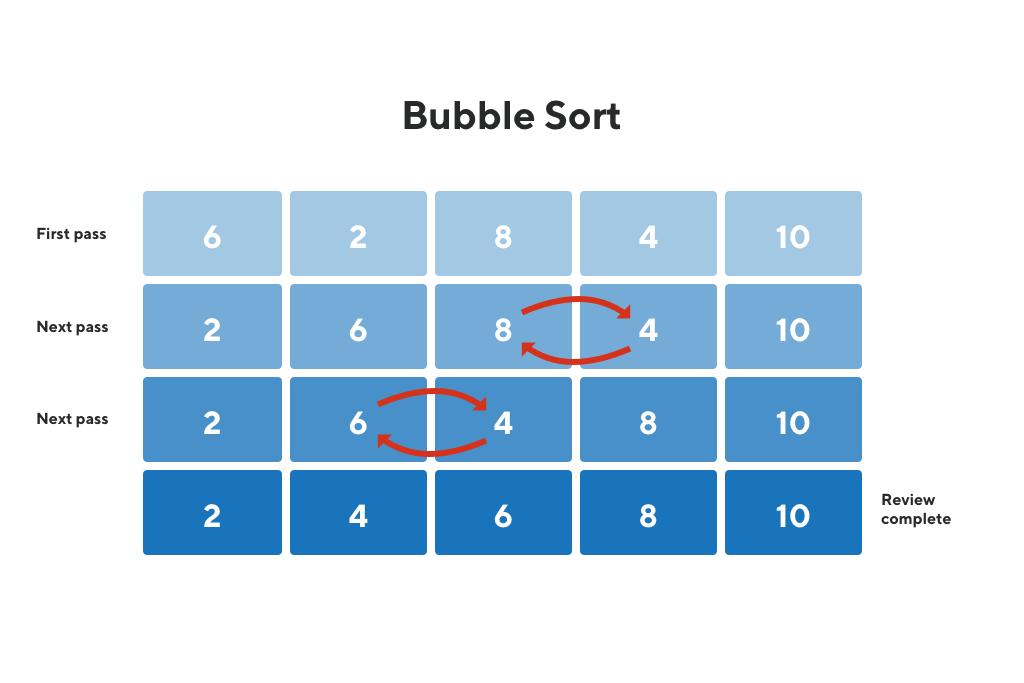

In [ ]:
# Troca inline de valores
a = 1
b = 2
print(a, b)
a, b = b, a
print(a, b)

1 2
2 1


In [1]:
#Implementaçao do bubble sort

def bubbleSort(lista): 
  tamanhoDaLista = len(lista)
  ordenado = False
  k = 0 #Não é usado no algoritmo
  while not ordenado:
    ordenado = True
    k += 1
    for i in range(tamanhoDaLista-1):
      if lista[i] > lista[i+1]:
        ordenado = False
        lista[i], lista[i+1] = lista[i+1], lista[i]
  print(k)
  return lista

lista_teste = [1, 5, 7, 2, 1, 1231, 6, 409328,3721, 1, 5, 8, 5]

print(bubbleSort(lista_teste))

8
[1, 1, 1, 2, 5, 5, 5, 6, 7, 8, 1231, 3721, 409328]


**Calculadora**

É um das aplicações mais básicas na maioria das linguagens de programação.

In [2]:
#@title Calculadora Simples
numero1 = 60 #@param {type:"number"}
operador = "coseno(numero1)" #@param ["+", "-", "*", "/", "seno(numero1)", "coseno(numero1)", "^"]
numero2 = 0 #@param {type:"number"}

import math

def getResultado(numero1, operador, numero2):
  resultado = 0
  if operador == "+":
    resultado = numero1 + numero2
  elif operador == "-": #else if
    resultado = numero1 - numero2
  elif operador == "*":
    resultado = numero1 * numero2
  elif operador == "/":
    if numero2 != 0:
      resultado = numero1 / numero2
    else:
      resultado = "Erro, divisão por zero"
  #Entrada em graus:
  elif operador == "seno(numero1)":
    resultado = math.sin(math.radians(numero1))
  elif operador == "coseno(numero1)":
    resultado = math.cos(math.radians(numero1))
  elif operador == "^":
    resultado = math.pow(numero1, numero2)
  return resultado

resultado = getResultado(numero1, operador, numero2)
print(resultado)

0.5000000000000001


**Caixeiro Viajante**

Um comerciante deseja viajar por varias cidades comprando e vendendo produtos. Ele quer seguir uma rota que tenha a menor distancia possivel, mas sem passar pela mesma cidade 2 vezes. E apos passar por todas as cidades, ele precisa voltar a cidade em que ele iniciou seu percurso.

Ou seja: dado N pontos como podemos passar por todos 1 vez e voltar ao ponto zero?

Usando uma busca exaustiva a complexidade desse problema seria N! Ou seja se voce tivesse 100 cidades (9.332622e+157 possiveis rotas) e rodasse o algoritmo completo o universo iria acabar e o codigo nao teria terminado de rodar.

[Traveling Salesman Problem](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-1153-7_1068)

[TSP - Wikipedia](https://pt.wikipedia.org/wiki/Problema_do_caixeiro-viajante)

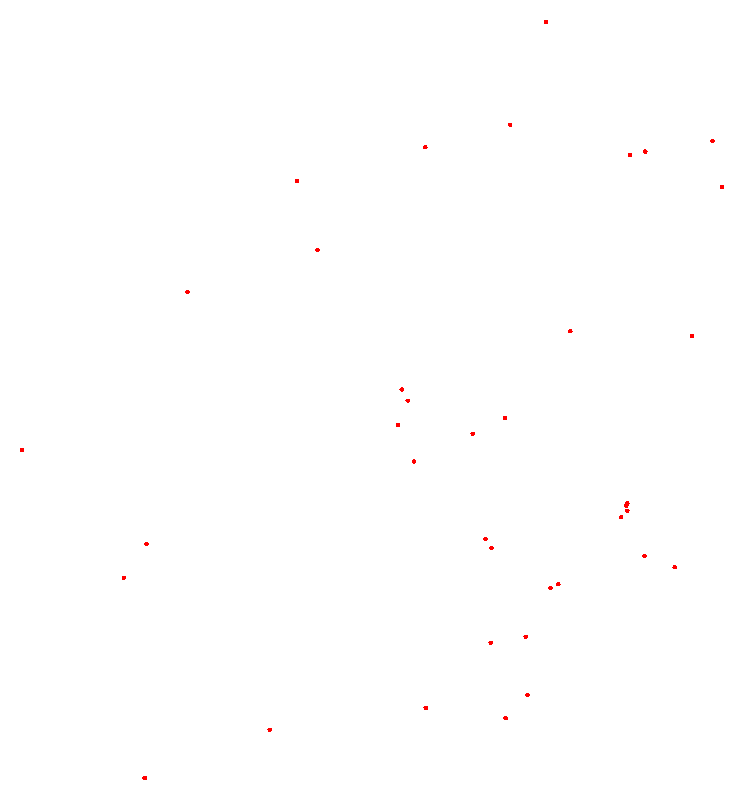

**Pandas**

[28 comandos úteis de Pandas que talvez você não conheça
](https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93)


[Doc Pandas](https://pandas.pydata.org/docs/)

**Dados**

Fonte: http://www.math.uwaterloo.ca/tsp/world/countries.html

País: Djibouti - 38 Cities

Melhor resultado possivel: 6656

Numero de cidades: 38

Numero de possiveis caminhos: 5.2302262e+44

In [11]:
import pandas as pd

cidades = pd.read_csv('/content/cidades.csv')


cidades.head()

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333


In [12]:
print(cidades.count())
print(cidades.count()[0])
NUM_CIDADES = cidades.count()[0]

 x    38
 y    38
dtype: int64
38


In [13]:
class cidade:
  def __init__(self, x, y):
    self.posicao_x = x
    self.posicao_y = y

  def distancia(self, cidade_externa):
    return  math.sqrt((self.posicao_x - cidade_externa.posicao_x)**2 + 
                      (self.posicao_y - cidade_externa.posicao_y)**2)

In [7]:
#Uma forma de acessar dados nos pandas dataframes
#' x', ' y'
cidades[' x'][0]

11003.6111

In [14]:
import random

# Cria uma lista de instancias de cidade a partir de um dataframe
def instanciar_cidades(cidades):
  lista = [] #Lista de Instâncias
  for i in range(0, NUM_CIDADES):
    cidade_aux = cidade(cidades[' x'][i], cidades[' y'][i])
    lista.append(cidade_aux)
  return lista

def gerar_solucao_aleatoria(lista_cidades):
  lista_de_cidades = list(range(0, NUM_CIDADES))
  lista_aleatoria = []
  for i in range(0, NUM_CIDADES):
    cidade = random.choice(lista_de_cidades) #index
    lista_aleatoria.append(lista_cidades[cidade])
    lista_de_cidades.remove(cidade)
  return lista_aleatoria

def fitness(possivel_solucao):
  fitness = 0
  for i in range(0, NUM_CIDADES): 
    if i < NUM_CIDADES - 1:
      fitness += possivel_solucao[i].distancia(possivel_solucao[i+1])
    else:
      fitness += possivel_solucao[i].distancia(possivel_solucao[0]) #último pro primeiro
  return fitness

In [15]:
#Lista de Objetos
lista_cidades = instanciar_cidades(cidades)
lista_cidades 

In [16]:
#Lista de Objetos Aleatória
solucao = gerar_solucao_aleatoria(lista_cidades)
solucao 

In [17]:
fitness(solucao)

29726.367402527696

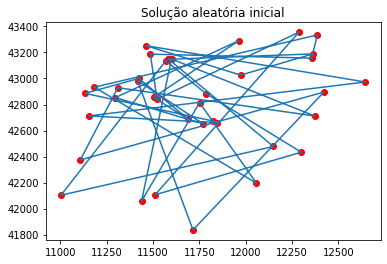

In [21]:
# --- Codigo para visualização ---
import matplotlib.pyplot as plt
# --- Codigo para demonstração visual utilizando matplotlib ---

# Caixeiro Viajante
def gerar_grafico(solucao):
  x = []
  y = []
  for i in range(0, NUM_CIDADES):
    x.append(solucao[i].posicao_x)
    y.append(solucao[i].posicao_y)
    plt.plot(solucao[i].posicao_x, 
             solucao[i].posicao_y, 'ro')
  #ro = red cicle markers

  x.append(solucao[0].posicao_x)
  y.append(solucao[0].posicao_y)
  plt.plot(x, y)
  plt.title('Solução aleatória inicial')
  plt.show()
# --- Fim do codigo para demonstração visual utilizando matplotlib ---

gerar_grafico(solucao)